Nuestro dataset consiste en un listado de publicaciones de autos a la venta en la plataforma de Craigslist, portal que detalla la información sobre el mercado de vehículos de EUA. Tomamos una muestra de 50K registros, ya que la base de datos completa era muy pesada (más de 1 GB). La base de datos puede ser descargada en este [link](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data)


In [347]:
import pandas as pd
from scipy import stats
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df = pd.read_csv('https://raw.githubusercontent.com/Rintok/equipo3_fase3_analisis/main/vehicles.csv')
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,7301614508,rhode island,4000,2008.00,mazda,3,good,4 cylinders,gas,175000.00,clean,other,fwd,compact,sedan,black,ri,41.65,-71.47
1,7316693170,phoenix,9788,2005.00,ford,e-250,NaN,NaN,gas,162871.00,clean,automatic,fwd,NaN,van,white,az,33.53,-112.18
2,7311554201,fayetteville,14888,2014.00,honda,accord sedan lx,good,NaN,other,47760.00,clean,automatic,fwd,NaN,sedan,NaN,ar,36.00,-94.28
3,7314899453,space coast,172,2012.00,toyota,rav4 limited,excellent,4 cylinders,gas,124753.00,NaN,automatic,NaN,NaN,SUV,NaN,fl,28.57,-81.29
4,7310645739,redding,27999,2015.00,ram,1500 tradesman 4x4,excellent,8 cylinders,gas,67666.00,clean,automatic,4wd,NaN,truck,NaN,ca,38.70,-121.27


In [348]:
df.shape

(50000, 19)

Al revisar los data types, vemos que casi todas nuestras columnas tienen el tipo correcto, excepto id y year. Lo ideal es que estas columnas sean strings, así que haremos las transformaciones necesarias

In [349]:
df.dtypes

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
state            object
lat             float64
long            float64
dtype: object

In [350]:
df.isnull().sum()

id                  0
region              0
price               0
year              134
manufacturer     2094
model             631
condition       20415
cylinders       20788
fuel              359
odometer          515
title_status      952
transmission      283
drive           15468
size            35940
type            10888
paint_color     15342
state               0
lat               752
long              752
dtype: int64

In [351]:
# Removemos NAs
df = df.copy().dropna(subset=['price', 'odometer', 'year','lat','long'])
#Sustituimos valores de NAs
df[['manufacturer','model','condition']] = df[['manufacturer','model','condition']].fillna('unknown')

# Convertimos year a int (es una variable categorica ordinal, es mas facil dejarlo como int para usarlo en el futuro)
df['year'] = df['year'].astype(int)
df['year_str'] = df['year']   # Para usar en graficas categoricas

# Convertimos a strings
str_columns = ['id', 'year_str']
df[str_columns] = df[str_columns].astype(str)
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,year_str
0,7301614508,rhode island,4000,2008,mazda,3,good,4 cylinders,gas,175000.00,clean,other,fwd,compact,sedan,black,ri,41.65,-71.47,2008
1,7316693170,phoenix,9788,2005,ford,e-250,unknown,NaN,gas,162871.00,clean,automatic,fwd,NaN,van,white,az,33.53,-112.18,2005
2,7311554201,fayetteville,14888,2014,honda,accord sedan lx,good,NaN,other,47760.00,clean,automatic,fwd,NaN,sedan,NaN,ar,36.00,-94.28,2014
3,7314899453,space coast,172,2012,toyota,rav4 limited,excellent,4 cylinders,gas,124753.00,NaN,automatic,NaN,NaN,SUV,NaN,fl,28.57,-81.29,2012
4,7310645739,redding,27999,2015,ram,1500 tradesman 4x4,excellent,8 cylinders,gas,67666.00,clean,automatic,4wd,NaN,truck,NaN,ca,38.70,-121.27,2015


<div class="markdown-google-sans">

## <strong>1. Estimados de Locación y Variabilidad</strong>
</div>

Nuestras únicas columnas numéricas son price y odometer, que representan el precio del auto publicado y la cantidad de millas que tiene en el odometro, respectivamente.


In [352]:
# Definimos una funcion que calcule todos los estadisticos que queremos para la columna que le alimentemos

def print_stats(col):
  print(f'Imprimiento estadisticos para la columna {col.name}')
  print(f'Media: {col.mean()}')
  print(f'Media Truncada: {stats.trim_mean(col, 0.1)}')
  print(f'Desviacion Estandar: {col.std()}')
  print(f'Rango: {col.max() - col.min()}')
  print(f'Rango Intercuartilico: {col.quantile(0.75) - col.quantile(0.25)}')
  print(f'Valor mínimo: {col.min()}')
  print(f'Percentil 10: {col.quantile(0.1)}')
  print(f'Percentil 25: {col.quantile(0.25)}')
  print(f'Mediana: {col.median()}')
  print(f'Percentil 75: {col.quantile(0.75)}')
  print(f'Percentil 90: {col.quantile(0.9)}')
  print(f'Valor máximo: {col.max()}\n')
  

# Estadisticos
print_stats(df['price'])
print_stats(df['odometer'])



Imprimiento estadisticos para la columna price
Media: 40047.0061716966
Media Truncada: 15765.28175062357
Desviacion Estandar: 4502520.6693596
Rango: 987654321
Rango Intercuartilico: 20505.0
Valor mínimo: 0
Percentil 10: 1000.0
Percentil 25: 5995.0
Mediana: 13995.0
Percentil 75: 26500.0
Percentil 90: 37590.0
Valor máximo: 987654321

Imprimiento estadisticos para la columna odometer
Media: 98592.0759324405
Media Truncada: 86979.87898891717
Desviacion Estandar: 215758.59632263638
Rango: 10000000.0
Rango Intercuartilico: 96359.0
Valor mínimo: 0.0
Percentil 10: 14900.0
Percentil 25: 37641.0
Mediana: 85576.0
Percentil 75: 134000.0
Percentil 90: 178000.0
Valor máximo: 10000000.0



Con estos resultados, se puede observar que hay mucho ruido. Particularmente, con el precio vemos un valor mínimo de 0, y un valor máximo de 987654321. El primer caso no tiene sentido ya que para ser una venta el precio debería ser mayor a 0, y en el segundo probablemente la persona que publicó el auto solo puso los digitos del 9 al 1 como un placeholder del precio.

Sobre el odometro ocurre algo similar. El valor de 0 es posible (un auto nuevo) pero el máximo es de 10 millones de millas. Considerando que un auto promedio viaja 10 mil millas al año, 10 millones es un dato muy descabellado.

<div class="markdown-google-sans">

## <strong>2. Visualización de datos: Distribuciones</strong>
</div>

Empezaremos a analizar la distribucion de nuestras variables numéricas. Como primer paso, haremos un boxplot.

In [353]:
import seaborn as sns
import matplotlib.pyplot as plt

In [354]:
sns.set(style="whitegrid")

# Función para visualizar boxplot e imprimir estadísticos de una columna dada
def visualize(col, title_plot, whiskers=1.5):
    sns.boxplot(x=col, whis=whiskers)
    plt.title(title_plot)
    print(col.describe())

count       48609.00
mean        40047.01
std       4502520.67
min             0.00
25%          5995.00
50%         13995.00
75%         26500.00
max     987654321.00
Name: price, dtype: float64


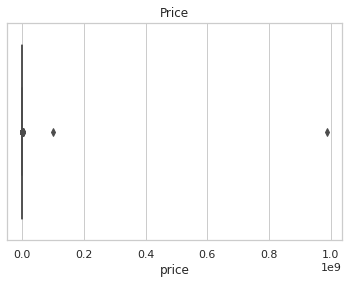

In [355]:
visualize(df['price'], 'Price')

count      48609.00
mean       98592.08
std       215758.60
min            0.00
25%        37641.00
50%        85576.00
75%       134000.00
max     10000000.00
Name: odometer, dtype: float64


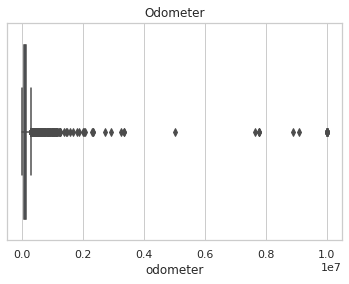

In [356]:
visualize(df['odometer'], 'Odometer')

En ambos casos no se logra apreciar una distribucion concreta, ya que nuestros valores máximos están muy por arriba de los típicos. Debemos empezar a filtrar los datos y eliminar cualquier número atípico. Para ello utilizaremos el Score de Rango Intercuartílico.



In [357]:
# Filtro de datos atípicos usando Score de Rango Intercuartílico.
def filter_by_iqr(df, colname):
  df_copy = df.copy()
  iqr = df_copy[colname].quantile(0.75) - df_copy[colname].quantile(0.25)
  filter_bot = df_copy[colname] > df_copy[colname].quantile(0.25) - (iqr * 1.5)
  filter_top = df_copy[colname] < df_copy[colname].quantile(0.75) + (iqr * 1.5)
  return df_copy[filter_bot & filter_top]


count   43983.00
mean    17754.85
std     12719.26
min         1.00
25%      6999.00
50%     14995.00
75%     26900.00
max     57112.00
Name: price, dtype: float64


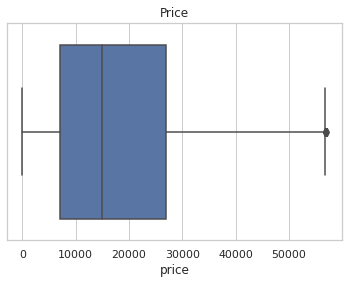

In [358]:
# Eliminamos filas con price y odometer atípicos
df = filter_by_iqr(df, 'price')
df = filter_by_iqr(df, 'odometer')

# Quitamos donde precio <= 0
df = df.query("price > 0")
df = df.query("year > 0")

visualize(df['price'], 'Price')

Ahora nuestro boxplot tiene mas sentido. Nuestro valor máximo es 50K, mientras el grueso de los datos está entere 7k y 27k, que son precios de auto razonables. Nuestra media y desviacion estándar disminuyeron significativamente.

Ahora analizaremos mas detenidamente nuestras nuevas distribuciones, utilizando histogramas y tablas de frecuencia.

In [359]:
def analyze_distribution(col):

  # Tabla frecuencias
  print("========== Tabla de Frecuencias ==========")
  segmentos = pd.cut(col, 15)
  print(col.groupby(segmentos).count())

  # Medidas
  print("\n========== Medidas ==========")
  print("Kurtosis:", stats.kurtosis(col))
  print("Asimetria:", stats.skew(col))
  
  # Histograma
  print("\n========== Histograma ==========")
  sns.displot(col, kde=False, bins=20)

========== Tabla de Frecuencias ==========
price
(-56.111, 3808.4]     4643
(3808.4, 7615.8]      7214
(7615.8, 11423.2]     5723
(11423.2, 15230.6]    4865
(15230.6, 19038.0]    4422
(19038.0, 22845.4]    2912
(22845.4, 26652.8]    3155
(26652.8, 30460.2]    2974
(30460.2, 34267.6]    2382
(34267.6, 38075.0]    2176
(38075.0, 41882.4]    1465
(41882.4, 45689.8]     834
(45689.8, 49497.2]     524
(49497.2, 53304.6]     428
(53304.6, 57112.0]     266
Name: price, dtype: int64

========== Medidas ==========
Kurtosis: -0.29810399686090383
Asimetria: 0.7134458710306554

========== Histograma ==========


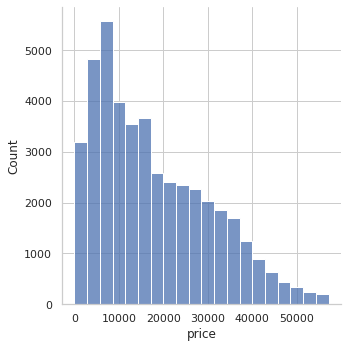

In [360]:
analyze_distribution(df['price'])

========== Tabla de Frecuencias ==========
odometer
(-278.511, 18567.4]     5183
(18567.4, 37134.8]      5406
(37134.8, 55702.2]      4367
(55702.2, 74269.6]      3935
(74269.6, 92837.0]      4261
(92837.0, 111404.4]     4726
(111404.4, 129971.8]    4089
(129971.8, 148539.2]    3639
(148539.2, 167106.6]    2951
(167106.6, 185674.0]    2027
(185674.0, 204241.4]    1486
(204241.4, 222808.8]     864
(222808.8, 241376.2]     541
(241376.2, 259943.6]     310
(259943.6, 278511.0]     198
Name: odometer, dtype: int64

========== Medidas ==========
Kurtosis: -0.511420645829519
Asimetria: 0.45685349466987657

========== Histograma ==========


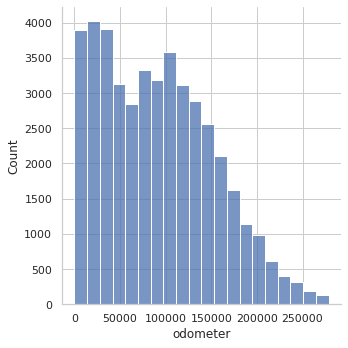

In [361]:
analyze_distribution(df['odometer'])

Visualmente, nuestras variables no se asemejan a una distribucion normal. Estadísticamente, en ambos casos (price y odometer), tenemos una Kurtosis negativa y Asimetría positiva, lo que significa que las distribuciones están algo concentradas (colas cortas) y sesgadas a la izquierda (asimétricas con la cola derecha más larga que la izquierda).

Para continuar con el análisis, compararemos la distribución de price con respecto al año del auto, y a la marca del mismo.

In [362]:
sns.set(style="darkgrid")

# Funcion que grafica la distribucion de una variable numérica con respecto a todas las categorias que aparecen en otra columna
def price_dist_by_category(df, colname_num, colname_str):
  categories = df[colname_str].value_counts().head().index
  
  for category in categories:
    sns.kdeplot(data = df.query(f"{colname_str} == '{category}'"), x = colname_num, label = category)

  plt.legend()


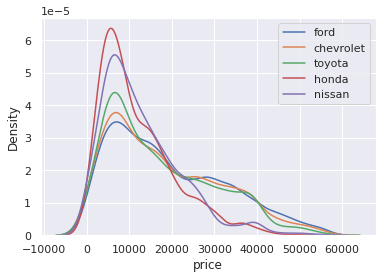

In [363]:
price_dist_by_category(df, 'price', 'manufacturer')

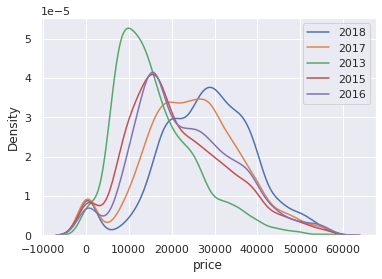

In [364]:
price_dist_by_category(df, 'price', 'year_str')

Para el caso de precio por marca de vehículo, no vemos una diferencia signifcante vs el histograma completo del precio: La mayor concentracion de datos se encuentra alrededor de los 8K dólares.

Por otro lado, en la distribucion por año ya comenzamos a notar diferencias. Podemos apreciar que la distribucion de precio para los autos 2013 está más a la izquierda, mientras que la de 2018 está un poco más a la derecha, ya que un auto más viejo suele ser más barato que uno más nuevo.

<div class="markdown-google-sans">

## <strong>3. Exploración de Variables Categóricas y Análisis Multivariable</strong>
</div>


In [365]:
# Listamos columnas categoricas. Eliminamos columnas númericas y columnas categoricas que tienen demasiados valores (solo para graficar)
cols_category = [col for col in df.columns if col not in {'id', 'price', 'odometer', 'model', 'year', 'year_str', 'region', 'state'}]

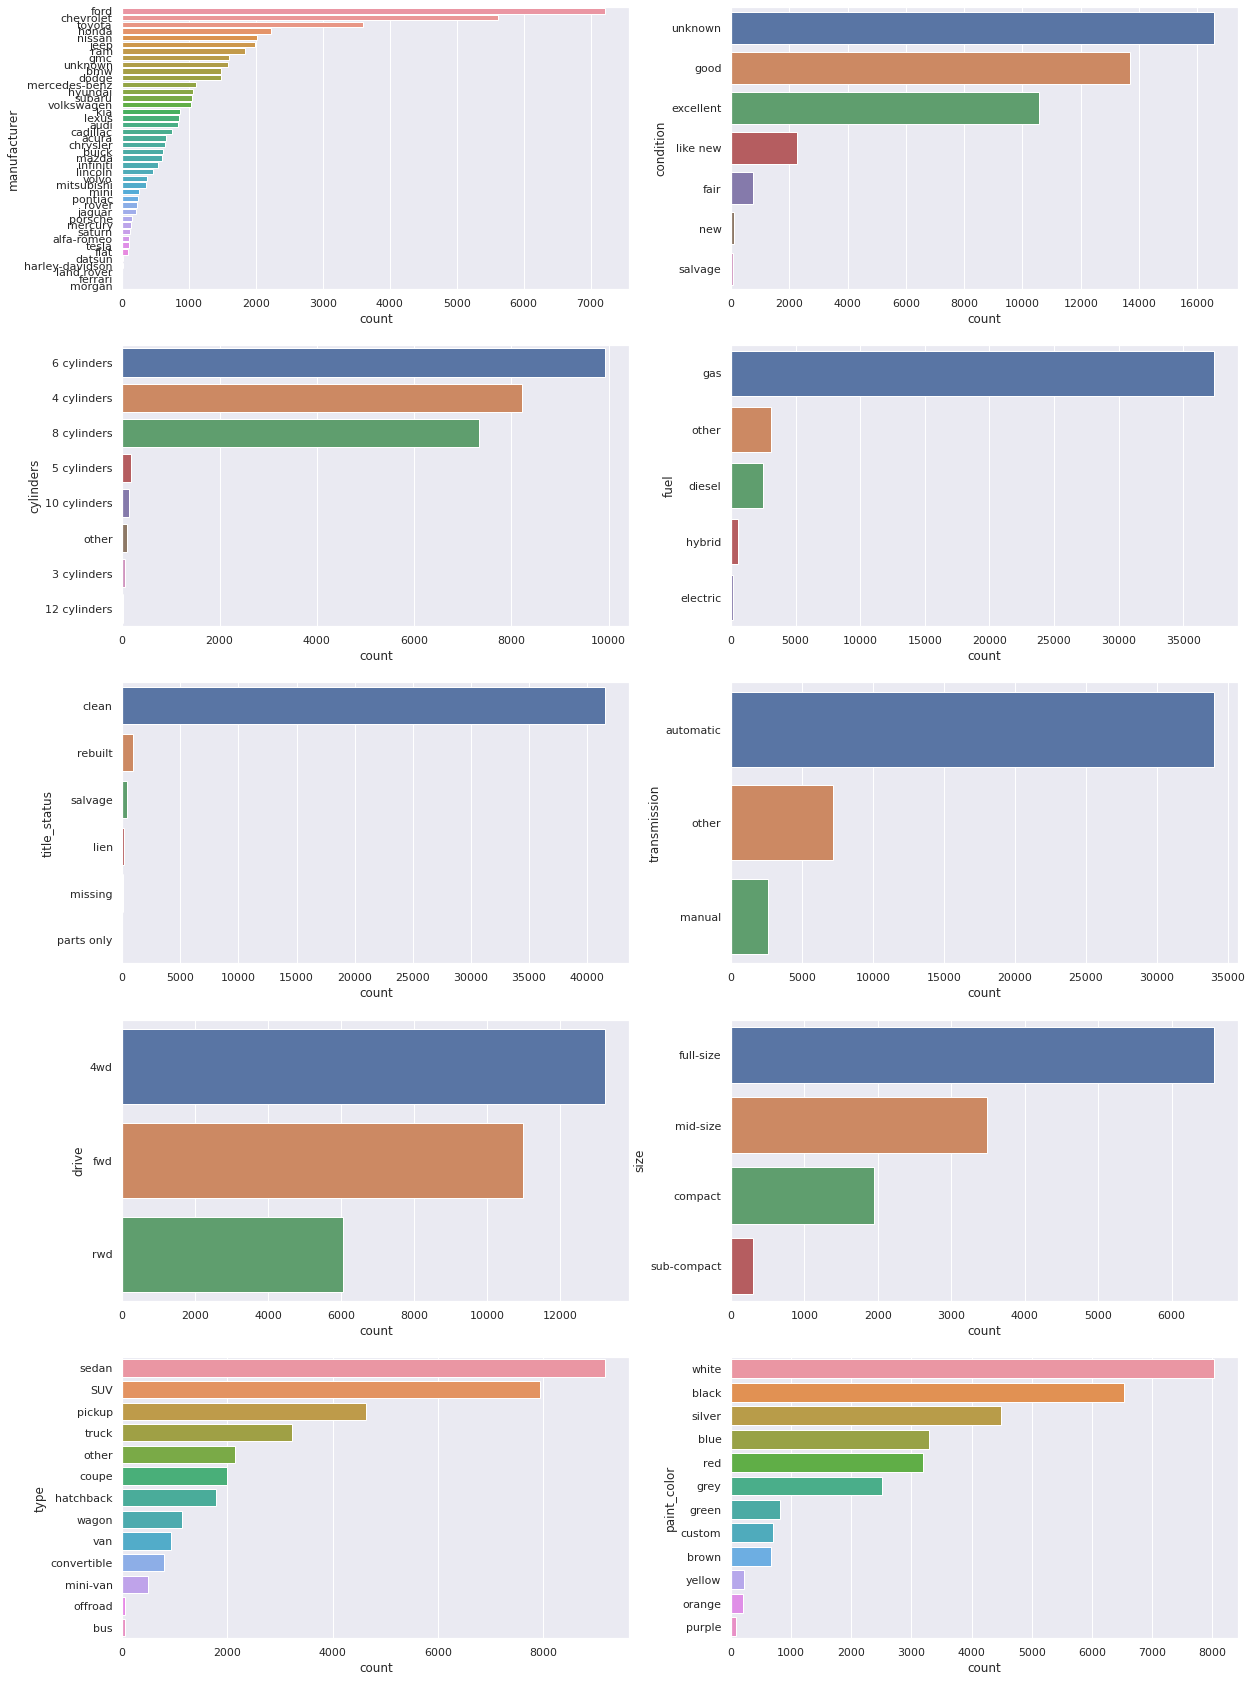

In [366]:
# Ploteamos cada una de nuestras variables categoricas dentro de un mismo subplot
fig, axes = plt.subplots(nrows=5, ncols=2, figsize = (20, 30))

for col, ax in zip(cols_category, axes.flat):
  sns.countplot(y = df[col], order = df[col].value_counts().index.to_list(), ax=ax)

plt.show()

Al hacer un crosstab entre condition y manufacturer, vemos que la condicion del vehiculo en venta varia mucho según la marca

In [367]:
pd.crosstab(df['manufacturer'], df['condition'], normalize='index')

condition,excellent,fair,good,like new,new,salvage,unknown
manufacturer,,,,,,,
acura,0.15,0.02,0.55,0.03,0.00,0.00,0.25
alfa-romeo,0.02,0.00,0.85,0.02,0.00,0.00,0.11
audi,0.19,0.01,0.46,0.04,0.00,0.00,0.30
bmw,0.25,0.01,0.39,0.05,0.00,0.00,0.30
buick,0.21,0.03,0.39,0.06,0.00,0.00,0.31
cadillac,0.24,0.02,0.38,0.05,0.00,0.00,0.31
chevrolet,0.24,0.02,0.30,0.05,0.00,0.00,0.38
chrysler,0.25,0.02,0.28,0.06,0.00,0.00,0.39
datsun,0.42,0.17,0.17,0.00,0.00,0.00,0.25


In [368]:
# Funcion para plotear crosstabs
def visualize_crosstabs(df_xtab, nrows, ncols, figsize):

  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize = figsize)
  for row, ax in zip(df_xtab.index, axes.flat):
    sns.barplot(y = df_xtab.loc[row].index,
              x = df_xtab.loc[row],
              ax=ax)
  plt.show()

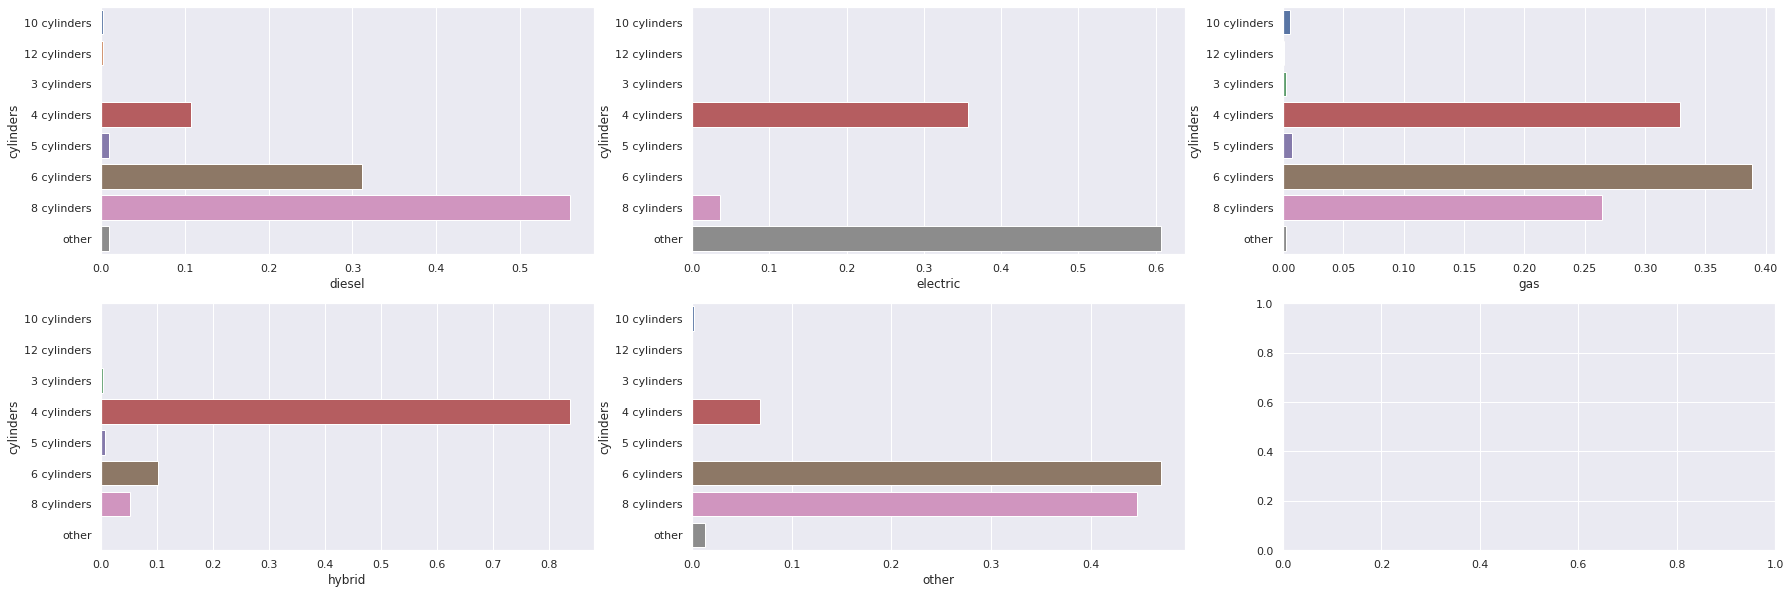

In [369]:
df_fuelcyl = pd.crosstab(df['fuel'], df['cylinders'], normalize='index')
visualize_crosstabs(df_fuelcyl, nrows=2, ncols=3, figsize=(30,10))

Aqui podemos ver el cilindraje más común según tipo de vehiculo. Se puede notar que los autos híbridos en su mayoría son de 4 cilindros, los de diesel de 8, y los de gasolina son variados (4,6,8).

Ahora haremos unos boxplots y violin plots para ver como se comportan los precios según la marca del vehiculo y año. Para no saturar las figuras, tomaremos solamente el top 5 de cada categoria.

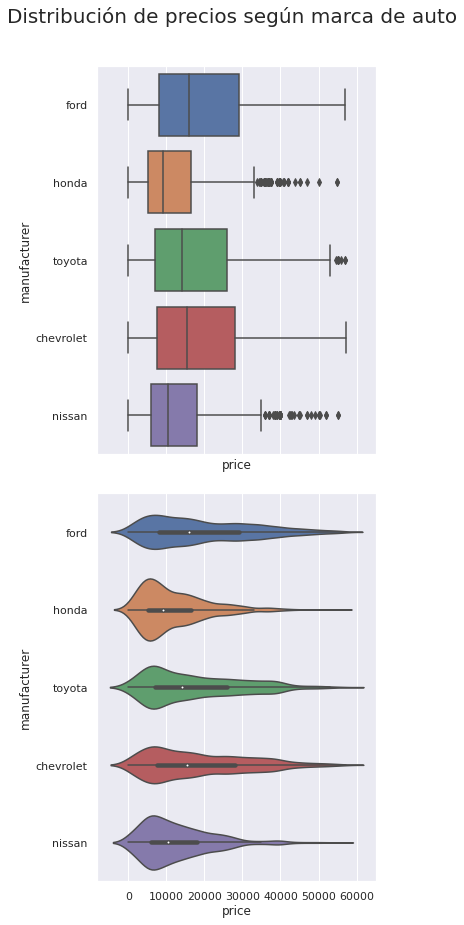

In [370]:
## Precio con marca

# Definimos subplot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (5,15), sharex=True)
fig.subplots_adjust(hspace = 0.1)
fig.suptitle("Distribución de precios según marca de auto", fontsize = 20, y = 0.935)
#sns.despine()

# Filtramos dataset
top_brands = list(df['manufacturer'].value_counts().head().index)
top_brands_df = df.query(f"manufacturer in {top_brands}")

# Graficamos
sns.boxplot(data = top_brands_df, x = 'price', y = 'manufacturer', ax = axes[0])
sns.violinplot(data = top_brands_df, x = 'price', y = 'manufacturer', ax = axes[1])

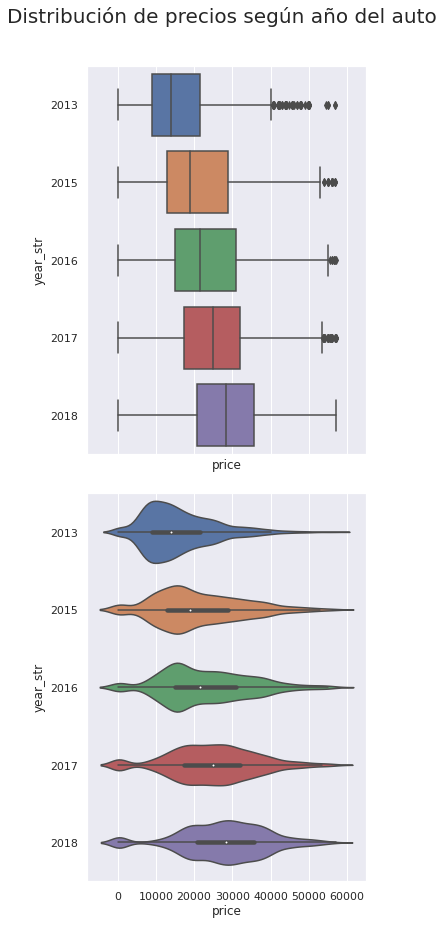

In [371]:
## Precio con año

# Definimos subplot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (5,15), sharex=True)
fig.subplots_adjust(hspace = 0.1)
fig.suptitle("Distribución de precios según año del auto", fontsize = 20, y = 0.935)
#sns.despine()

# Filtramos dataset
top_years = sorted(list(df['year_str'].value_counts().head().index))
top_years_df = df[df['year_str'].isin(top_years)]

# Graficamos
sns.boxplot(data = top_years_df, x = 'price', y = 'year_str', order = top_years, ax = axes[0])
sns.violinplot(data = top_years_df, x = 'price', y = 'year_str', order = top_years, ax = axes[1])

En el caso de las marcas, se puede observar que los precios para un Honda o un Nissan ronda alrededor de los 10k, y sus precios se concetran entre los 7k y 18k. Para los Ford, Toyota, y Chevrolet observamos mayor variacion de precios y mediana más elevada, cerca de 15k

Para los precios según el año del vehículo, se mira claramente como el precio tiende a ser más elevado conforme el auto es más nuevo. Mientras que en el 2013 la mediana de precio era alrededor de 15k, para un auto 2018 es casi de 30k. Gracias a las gráficas utilizadas este movimiento en los precios es muy evidente.

<div class="markdown-google-sans">

## <strong>4. Correlaciones y Regresión Lineal Simple</strong>
</div>

En nuestro dataset, las variables numericas que tenemos son price, year y odometer. Debido a que hay una relacion directa entre el valor del odometro (millas recorridas) y el uso del vehiculo, podemos inferir que existira una correlacion negativa entre precio y odometro, mientras que el aso contrario aplicara para precio y year (un vehiculo con mucho uso tendera a valer menos que uno con poco uso). Veremos si esta hipotesis se cumple.


In [372]:
df_corr = df[['price', 'odometer', 'year']].corr()
df_corr

,price,odometer,year
price,1.00,-0.52,0.37
odometer,-0.52,1.00,-0.31
year,0.37,-0.31,1.00


Parece ser que nuestra hipotesis es correcta, hay una correlacion positiva entre price y year, y una correlacion negativa entre price y odometer. Seguiremos con nuestro análisis para confirmar que estamos en lo correcto

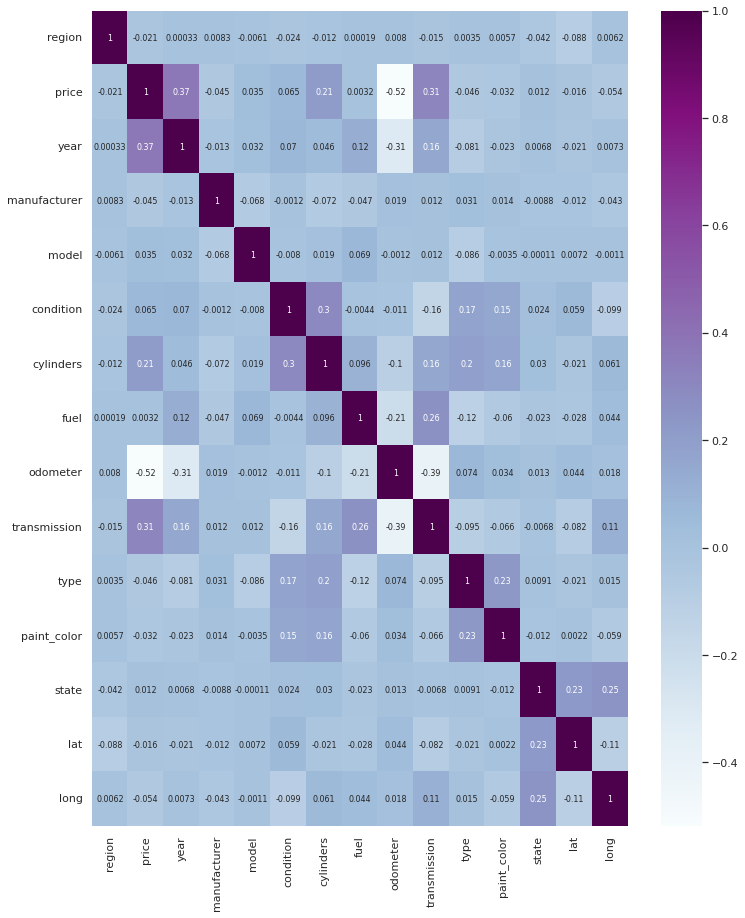

In [373]:
#Correlación entre variables
from sklearn import preprocessing

df_correlacion = df.copy()

le = preprocessing.LabelEncoder()
df_correlacion[['region','manufacturer','model', 'condition', 'cylinders','fuel','transmission','type','paint_color','state']] = \
df_correlacion[['region','manufacturer','model', 'condition', 'cylinders','fuel','transmission','type','paint_color','state']].apply(le.fit_transform)

plt.figure(figsize=(12,15))
cor = df_correlacion.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.BuPu,annot_kws = {'size':8})
plt.show()

Se realizó un *Pairplot* para observar el comportamiento de nuestras variables cuantitativas de interés

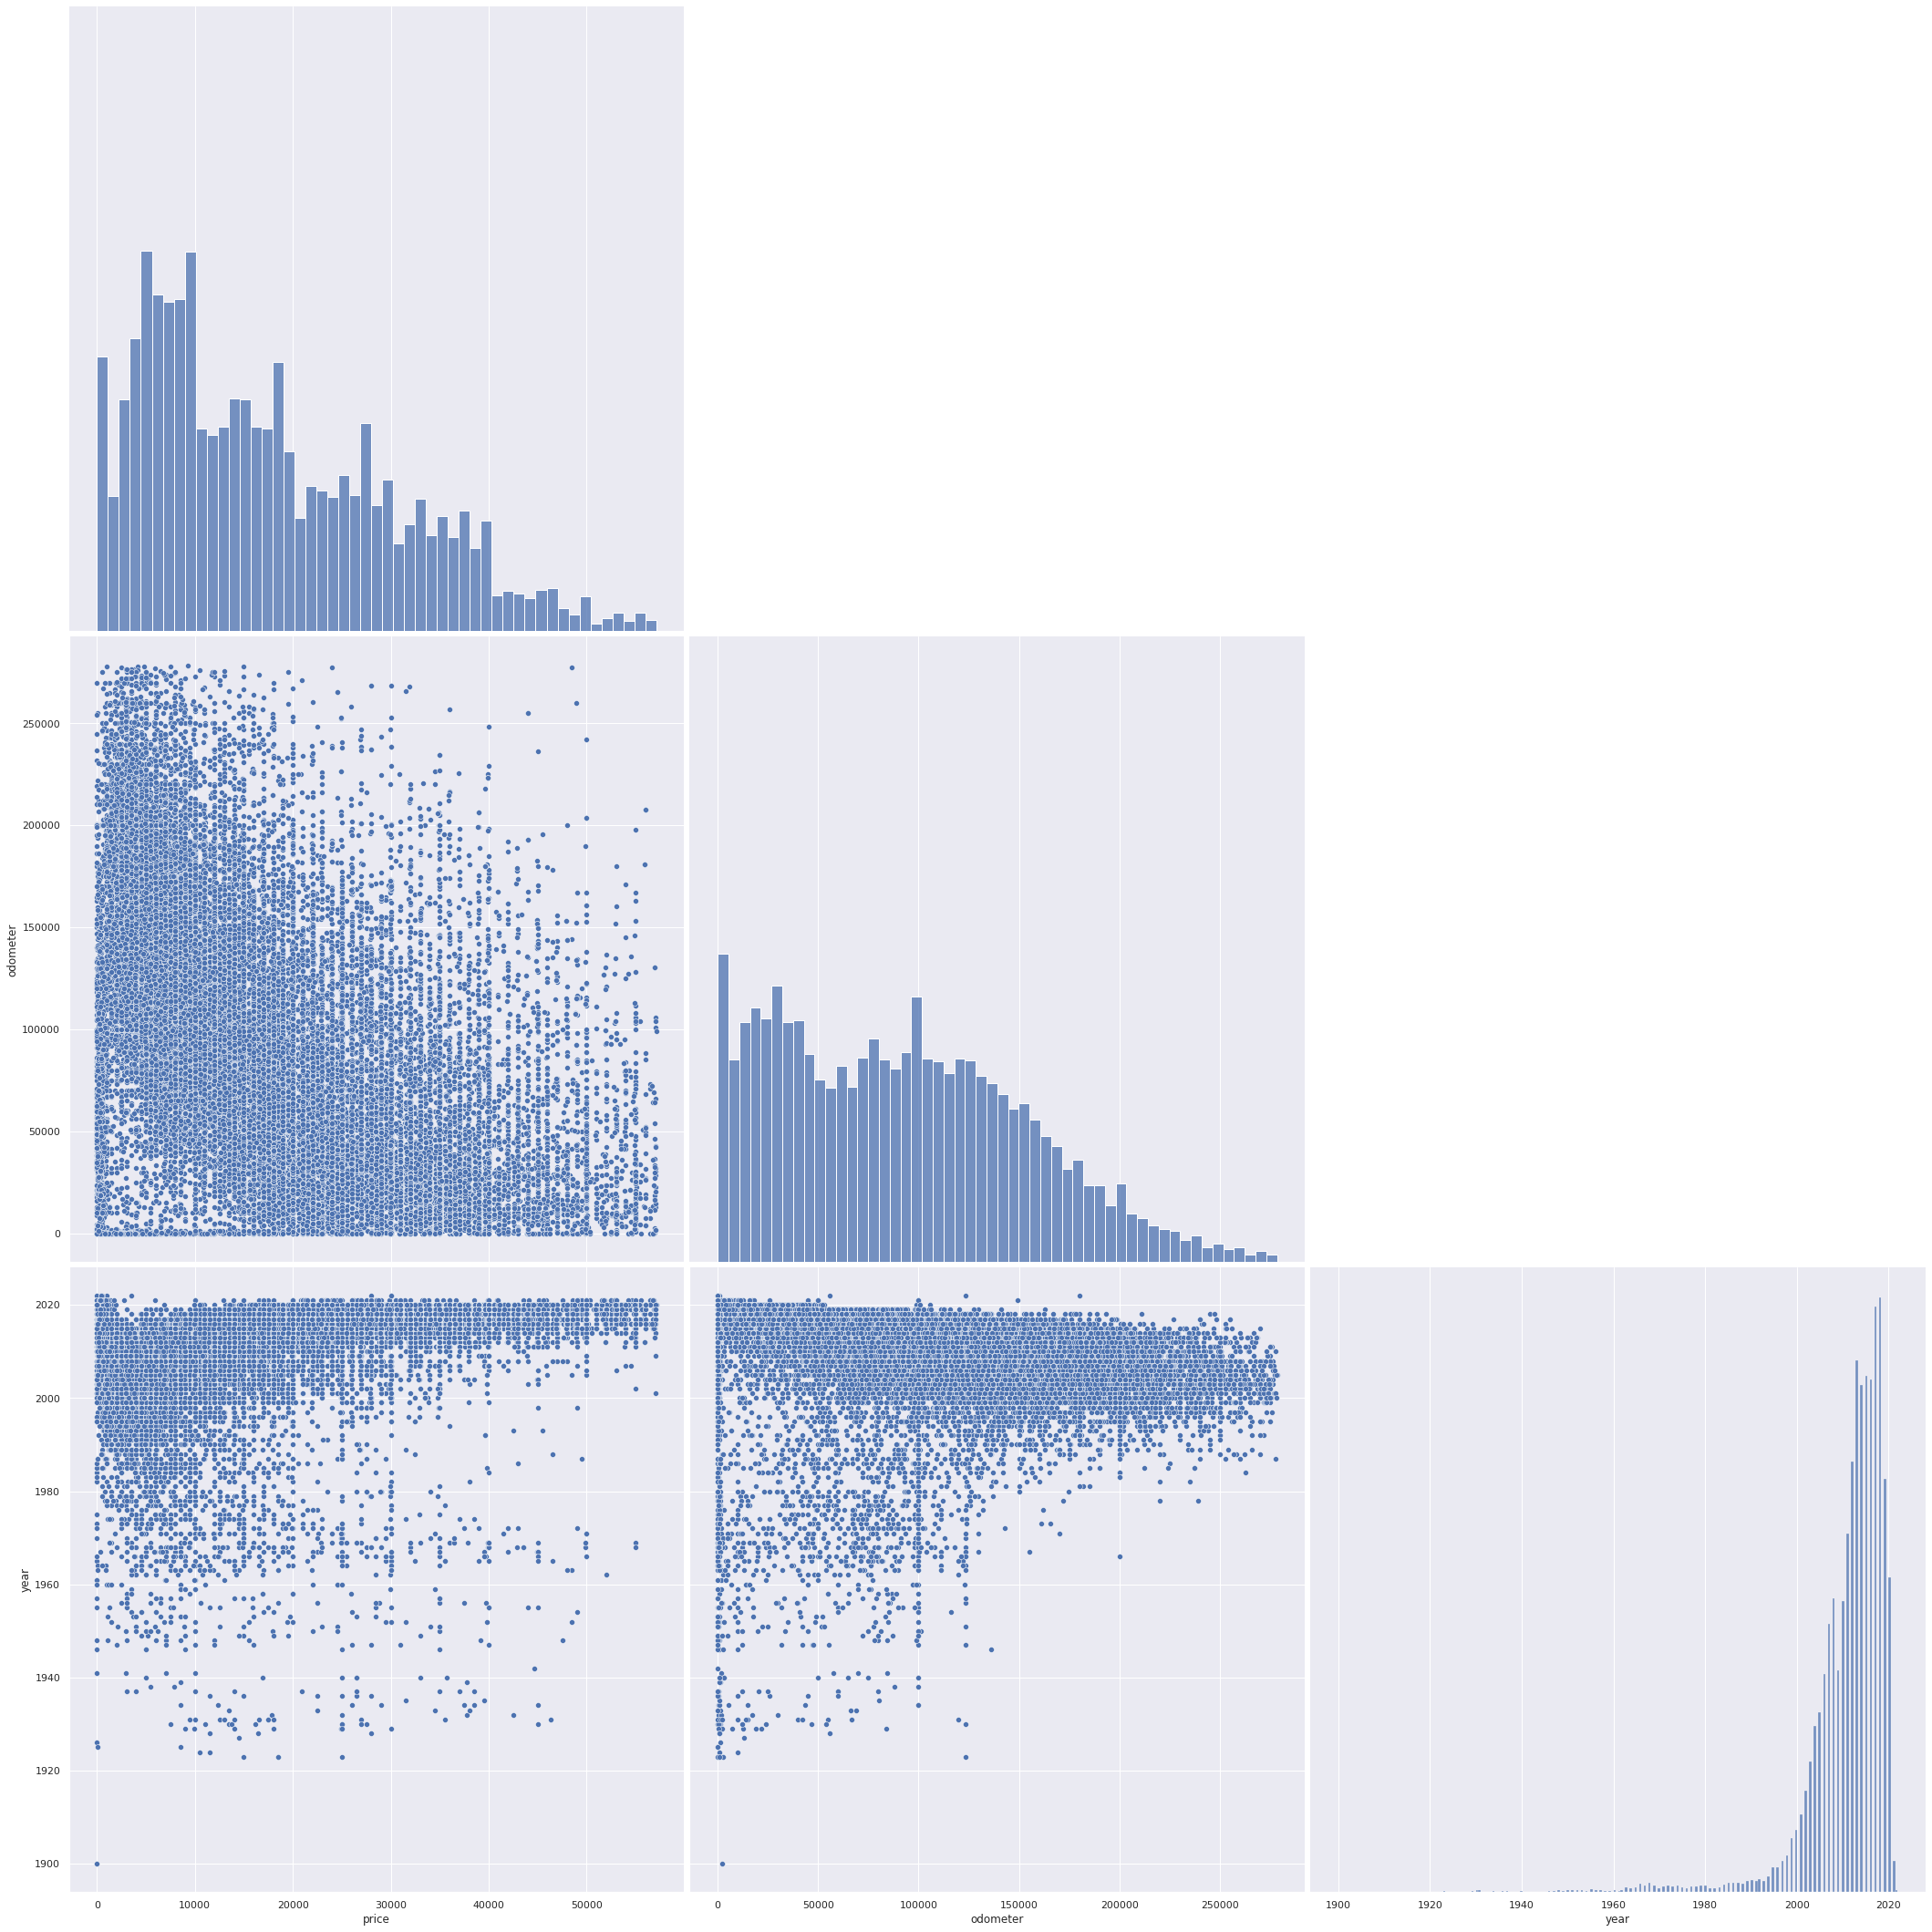

In [374]:
sns.pairplot(data=df[['price', 'odometer', 'year']], corner=True, height=10)

En la mayoria de los casos, los datos estan muy dispersos y no podemos concluir sobre alguna relacion, en la unica grafica donde se alcanza a apreciar algo es en year vs price, conforme el año del vehiculo aumenta, el precio de este tambien. Veamos si con una regresion podemos obtener mejores conclusiones


In [375]:
from sklearn.linear_model import LinearRegression
import numpy as np

def run_lm(x, y, plot=True):
  lr = LinearRegression()
  if not isinstance(x, pd.DataFrame):
    x_frame = x.to_frame()
  else:
    x_frame = x

  lr.fit(x_frame, y)

  y_predict = lr.predict(x_frame)
  intercept = lr.intercept_
  coefficient = lr.coef_[0]
  r2 = lr.score(x_frame, y)

  print(f'''
  Intercept: {intercept}\n
  Coefficient: {coefficient}\n
  R2: {r2}\n
  Prediction: {y_predict}\n  
  ''')  

  if not plot:
    return

  # Visualizamos 
  fig, ax = plt.subplots(figsize = (6,6))

  sns.scatterplot(x = x, y = y,
                  label = 'Datos originales', alpha = 0.3,
                  ax = ax)
  sns.scatterplot(x = x, y = y_predict,
                  label = 'Predicciones del modelo',
                  ax = ax)



  Intercept: 27673.002655406537

  Coefficient: -0.1080833413151829

  R2: 0.2688216381350286

  Prediction: [ 8758.41792525 10069.36077206 22510.94227419 ... 12535.93070422
 27326.59554649 14162.58499101]
  
  


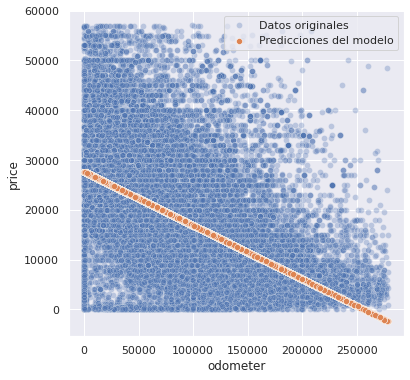

In [376]:
run_lm(df['odometer'], df['price'])

Al hacer la regresion con precio como dependiente y odometer como independiente, nuestro modelo resulta ser Y = 27586.19 - (0.107)X, obtuvimos un R2 muy bajo de 0.26, sugiriendo que no hay una relacion concreta entre estas variables. Añadiremos la variable year a las variables independientes para ver si se mejora nuestra regresion

In [377]:
run_lm(df[['odometer', 'year']], df['price'], plot=False)


  Intercept: -608487.6782089225

  Coefficient: -0.09307594679465986

  R2: 0.31897928613793225

  Prediction: [ 9062.48519042  9244.43354717 22799.40826442 ... 13262.45933282
 28524.69007706 10244.05992309]
  
  


Al agregar year, el R2 mejoro a 0.31 pero sigue siendo muy bajo para hacer alguna conclusion. Esto podria ser porque en el dataset estamos incluyendo todas las marcas de autos, podria ser que un auto viejo sea considerado como clásico, tenga precio alto, y afecte nuestros resultados. De igual manera, el mercado de autos usados puede ser diferente en cada estado de Estados Unidos, o talvez la dinamica de precios es diferente entre autos sedan, SUV, Pickup, etc.

<div class="markdown-google-sans">

## <strong>5. Distribuciones muestrales y técnicas de evaluación de modelos</strong>
</div>

Haremos un análisis en nuestras variables numericas, utilizando el metodo de bootstrab, revisando las medidas de locación y dispersión, y utilizando modelos de regresión lineal múltiple


In [378]:
# Funcion para generar bootstrap
def bootstrap(series, size, iter = 100000):
  lista_means = []
  n = size if size > 1 else int(len(series) * size)
  for i in range(iter):
    sample = series.sample(n = n, replace = True)
    lista_means.append(sample.mean())
  return pd.Series(lista_means)


Utilizamos bootstrp para generar una distribucion de medias para la variable precio

In [379]:
price_means = bootstrap(df['price'], 0.20)

Recordamos nuestros estadisticos de la variable precio

count   43983.00
mean    17754.85
std     12719.26
min         1.00
25%      6999.00
50%     14995.00
75%     26900.00
max     57112.00
Name: price, dtype: float64


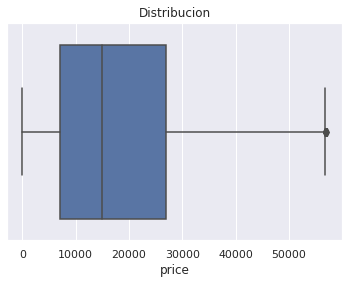

In [380]:
visualize(df['price'], title_plot="Distribucion")

Media real: 17754.85199
Media bootstrap: 17754.53872
Kurtosis real: -0.298
Kurtosis boostrap: 0.02214
Asimetria real: 0.71347
Asimetria boostrap: 0.01304
Rango: 1216.05662
Desv estandar real: 12719.25554
Error estandar: 135.7317
Proporcion de
error estandar: 11.16163%


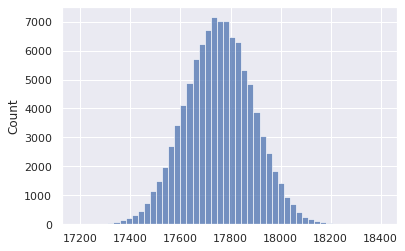

In [381]:
# Graficar resultados e información de los bootstrap
print(f"Media real: {round(df['price'].mean(),5)}")
print(f"Media bootstrap: {round(price_means.mean(),5)}")
print(f"Kurtosis real: {round(df['price'].kurtosis(),5)}")
print(f"Kurtosis boostrap: {round(price_means.kurtosis(),5)}")
print(f"Asimetria real: {round(df['price'].skew(),5)}")
print(f"Asimetria boostrap: {round(price_means.skew(),5)}")
print(f"Rango: {round(price_means.max() - price_means.min(),5)}")
print(f"Desv estandar real: {round(df['price'].std(),5)}")
print(f"Error estandar: {round(price_means.std(),5)}")
print(f"Proporcion de\nerror estandar: {round(100 * (price_means.std()/(price_means.max() - price_means.min())),5)}%")

sns.histplot(x = price_means, bins = 50)

Al ver los resultados, la media real es muy similar a la media de las muestras. La distribucion de medias se asimila a una normal en el histograma, aunado a las medidas de Asimetria y Kurtosis que calculamos y resultaron cercanas a cero. Nuestro error estandar fue de 133, que representa un 11% con respecto al rango de las medias muestrales

In [382]:
def intervalo_de_confianza(series, confianza = 0.95):
    alpha = round((1-confianza)/2,5)
    limite_inf = series.quantile(alpha)
    limite_sup = series.quantile(1 - alpha)
    print(f"Intervalo de {confianza * 100}% confianza de la media: {limite_inf} < {series.mean()} < {limite_sup}")

Revisamos el intervalo de confianza de nuestra muestra

In [383]:
intervalo_de_confianza(series = price_means)

Intervalo de 95.0% confianza de la media: 17489.04269270123 < 17754.538716580264 < 18020.6386368804


Ahora analizamos con una regresion lineal multiple

In [384]:
from sklearn.model_selection import train_test_split

lm_split = LinearRegression()

X = df[['odometer', 'year']]
y = df['price']
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
lm_split.fit(X_training, y_training)

# Calculamos score
lm_split.score(X_test, y_test)


0.310399135665711

Con la regresion lineal multiple, nuestro score incrementó un poco, sin embargo sigue siendo demasiado bajo para generar alguna conclusion razonable. Ahora haremos cross validation para alimentar más nuestro análisis.

In [385]:
from sklearn.model_selection import cross_validate
lm_cv = LinearRegression()
scores = cross_validate(lm_cv, X, y, scoring='r2')
scores
# Obtenemos la evaluacion
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: 0.319 +/- 0.009


<div class="markdown-google-sans">

## <strong>6. Visualización de Datos Avanzada</strong>
</div>

Algo que nos resulta interesante es conocer como se comporta el mercado de autos usados en los distintos estados de Estados Unidos. Especificamente, quisieramos saber a simple vista en donde se publican más vehiculos. Para ello, haremos uso de un mapa cloroplético para ver en donde se realizan más publicaciones de venta de autos usados.


In [386]:
import folium

# Creamos df para un mapa
df_states = df['state'].value_counts().to_frame().reset_index()
df_states.rename(columns={'index': 'state', 'state': 'cars_on_sale'}, inplace=True)
df_states['state'] = df_states['state'].str.upper()


In [387]:
# Creamos el mapa
usa_map = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'
map = folium.Map(width=1000, location=[48, -102], zoom_start=4)

folium.Choropleth(
    geo_data=usa_map,
    name="choropleth",
    data=df_states,
    columns=['state', 'cars_on_sale'],
    key_on='feature.id',
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Autos Usados a la Venta",
    ).add_to(map)
folium.LayerControl().add_to(map)
map


Podemos apreciar que el estado con mayor mercado de autos usados es California, seguido de Florida y Texas. Los estados del centro y Alaska parecen no ser un buen mercado (pocas publicaciones).

Anteriormente, intentamos analizar la relacion precio-odometro de manera visual, sin embargo, la cantidad de datos era tan grande que fue algo dificil hallar una relacion concreta. Para esto, filtraremos el dataset para solamente revisar vehiculos toyota, y realizaremos algunos scatterplot por categorias para ver si podemos sacar algunas conclusiones interesantes

In [388]:
# Filtramos dataset
df_toyota = df[df['manufacturer'] == 'toyota']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



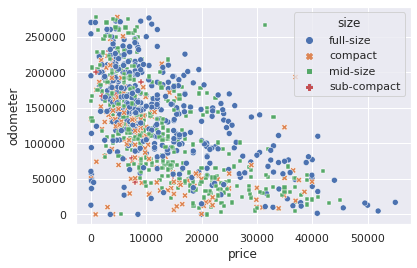

In [389]:
sns.scatterplot(df_toyota['price'], df_toyota['odometer'], hue=df_toyota['size'], style=df_toyota['size'])

Al hacer un scatterplot diferenciando por tamaño del auto, los datos siguen estando muy concentrados y no podemos ver alguna relacion interesante. Cambiaremos nuestra variable categoria a cilindraje

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



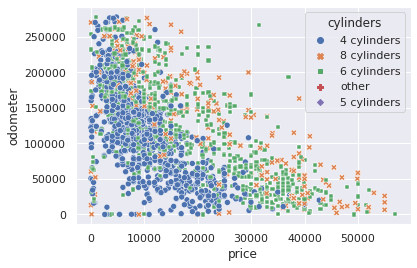

In [390]:
sns.scatterplot(df_toyota['price'], df_toyota['odometer'], hue=df_toyota['cylinders'], style=df_toyota['cylinders'])

Aqui ya se empieza a apreciar algo interesante. Parece que los autos de 4 cilindros están mas concentrados en precios bajos, mientras que los de 6 y 8 cilindros aparecen en precios más elevados

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



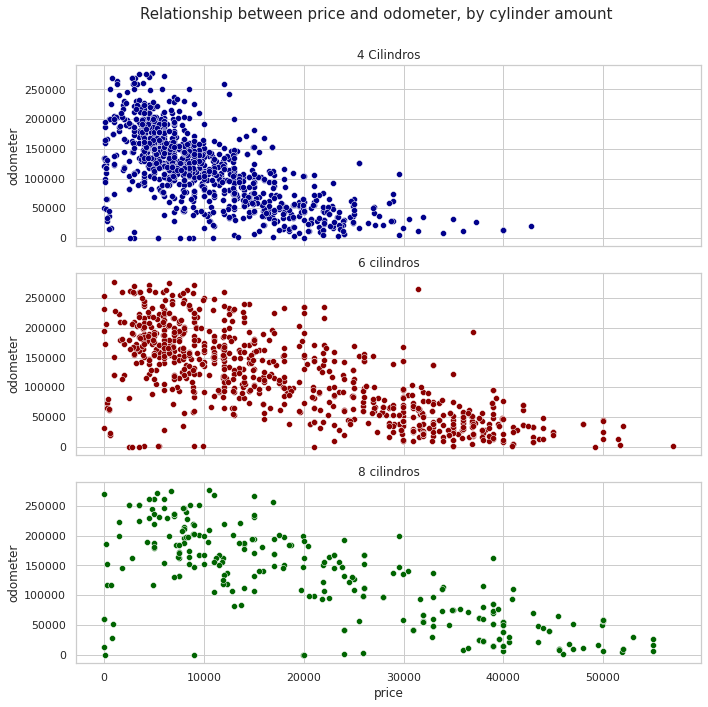

In [391]:
sns.set_style('whitegrid')

fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (10, 10), sharex=True)

i = 0
for cyl, color in zip(['4 cylinders', '6 cylinders', '8 cylinders'], ['darkblue', 'darkred', 'darkgreen']):
  df_toy_temp = df_toyota[df_toyota['cylinders'] == cyl]
  sns.scatterplot(df_toy_temp['price'], df_toy_temp['odometer'], ax=axes[i], color=color)
  i += 1

axes[0].set_title('4 Cilindros')
axes[1].set_title('6 cilindros')
axes[2].set_title('8 cilindros')

fig.suptitle('Relationship between price and odometer, by cylinder amount', fontsize=15, x=0.53)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

Al separar los scatterplots a graficos individuales, nuestra afirmación es más aparente. A mayor cilindraje, los precios de los vehiculos se concentran en valores más altos

Para ejemplos prácticos y de representatividad, se extrajo una muestra de manera aleatoria de 500 automóviles, buscando demostrar la relación que existe entre el precio de cada unidad con su respectivo uso en millas.

Los resultados se obtuvieron de la siguiente manera, segmentando el análisis por fabricante. Los detalles específicos de cada vehículo se pueden encontrar al realizar un "hover selector" sobre el punto deseado.

In [392]:
import plotly.express as px

df_comparativa = df.copy()

scat_plot2=px.scatter(df_comparativa.sample(500),x='price',y='odometer',color='manufacturer', hover_data=['year','model','condition'],template='presentation',color_discrete_sequence=px.colors.qualitative.Bold[0:len(df['manufacturer'].unique())-1],
                labels={
"price": "Precio($)",
"odometer": "Odómetro(Millas)",
"year":"Año",
"model":"Modelo",
"condition":"Condición",
"manufacturer":"Fabricante"},title="Relación Precio-Kilometraje")
scat_plot2.show()

En el siguente diagrama de dispersión, se puede apreciar la relación entre el año de fabricación del vehículo vs el precio de venta en el mercado.
Como se puede deducir de manera intiutiva, cuánto más antiguo es el coche menor es su valor de venta.
Cada punto representado está categorizado por colores dependiendo del uso por millaje que se le ha dado al automóvil. Cuánto más antiguo es el vehículo, mayor será su odómetro.

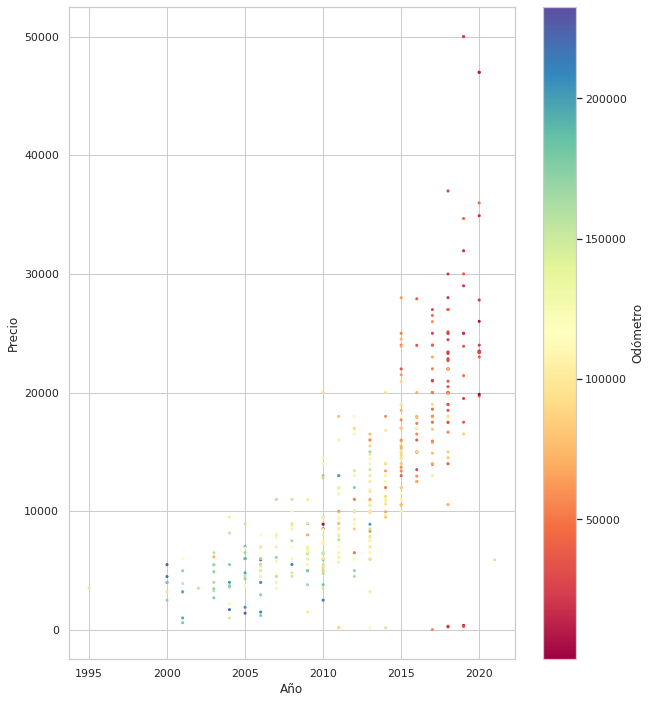

In [393]:
df_brand = df.copy()

df_brand=df.query('manufacturer=="nissan" & type=="SUV"')

plt.figure(figsize=(10,12))

x = df_brand['year']
y = df_brand['price']
plt.scatter(x, y, c=df_brand['odometer'], cmap='Spectral',s=4)
cbar = plt.colorbar()
plt.xlabel('Año')
plt.ylabel('Precio')
cbar.set_label('Odómetro');

Por último, el siguiente *treemap* nos muestra la participación de cada marca en el mercado, siendo la suma total de los precios el parámetro de comparación para este ejercicio.

In [394]:
df_tree= df.copy()

treemap2_df=df_tree.groupby(['manufacturer','type'])[['price']].sum()
treemap2_df.reset_index()
treemap2_df.reset_index(inplace=True)

fig = px.treemap(treemap2_df, path=[px.Constant("Manufacturer"), 'manufacturer', 'type'], values='price',
                  color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

<div class="markdown-google-sans">

## <strong>7. Procesamiento de Lenguaje Natural</strong>
</div>

Debido al tamaño del dataset, tomamos únicamente una muestra de 2000 registros para éste analisis. Las descripciones del vehiculo son textos muy extensos y haven que el archivo sea muy pesado.


In [395]:
# Importamos datos
df_text = pd.read_csv('https://raw.githubusercontent.com/Rintok/equipo3_fase3_analisis/main/vehicles_description.csv')
df_text.sample(3)

,id,description
1854,7314280565,2008 Saab 9-7x (gmc envoy) same vehicle 1-owne...
240,7304819873,2013 Chrysler Town and Country Touring 4dr Min...
1918,7304230723,This 2018 Chevrolet Malibu 4dr Sdn LT w/1LT ha...


In [396]:
# Comenzamos a limpiar nuestros datos
df_text['description'] = df_text['description'].str.replace("<br>|<br/>|br", '')  # breaks
df_text['description'] = df_text['description'].str.replace("[^\w\s]","")         # signos
df_text['description'] = df_text['description'].str.replace("\d","")              # digitos (cualquier numero relevante deberia estar en las otras columnas)
df_text['description'] = df_text['description'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.



In [397]:
# Importamos nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [398]:
tokenized_words = df_text['description'].apply(nltk.word_tokenize)
all_words = tokenized_words.sum()
text_all_words = nltk.Text(all_words)

In [399]:
# Calculamos riqueza léxica
(len(set(text_all_words)) / len(text_all_words)) * 100

3.8567733840770337

In [400]:
text_all_words.collocations()

crew cab; bad credit; bmw series; reasonable effort; omissions
contained; wheel drive; polish wax; wax seal; steering wheel; avoiding
persontoperson; barget prequalified; authorized representatives; fewer
expenses; athttpfinancecarvanaautocomcost savings; receiving calls;
httpaboutcarvanaautocompremium detail; middle man; marketingsales
purposes; informational purpose; telephone numbers


In [401]:
from nltk.corpus import stopwords
english_stop_words = stopwords.words('english')
all_words_except_stop_words = [word for word in text_all_words if word not in english_stop_words]
freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)
freq_dist_no_stop_words.most_common(20)

[('vehicle', 4522),
 ('car', 4128),
 ('credit', 4098),
 ('call', 3557),
 ('l', 3114),
 ('cars', 2955),
 ('text', 2853),
 ('front', 2809),
 ('financing', 2674),
 ('auto', 2589),
 ('us', 2560),
 ('f', 2557),
 ('cab', 2555),
 ('power', 2537),
 ('ford', 2371),
 ('wheel', 2324),
 ('carvana', 2289),
 ('stock', 2249),
 ('rear', 2239),
 ('drive', 2135)]

Las palabras mas comunes son obvias, como vehicle, car, cars, auto, etc. tambien hay algunas referentes a financiamiento y credito (metodos de compra)

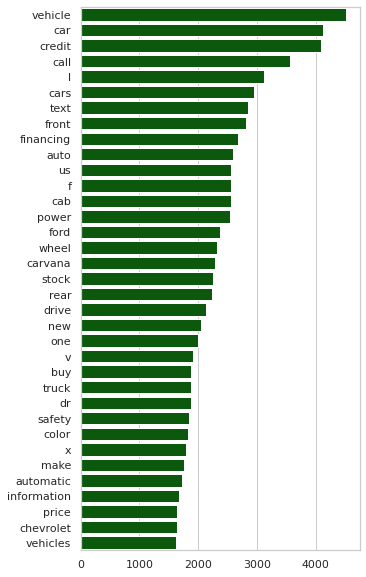

In [402]:
# Graficamos palabras mas comunes
common_words = {}

for element in freq_dist_no_stop_words.most_common(35):
    common_words[element[0]] = element[1]

series_common_words = pd.Series(common_words)
fig, ax = plt.subplots(figsize = (5,10))
sns.barplot(y = series_common_words.index,
            x = series_common_words,
            color = 'darkgreen')

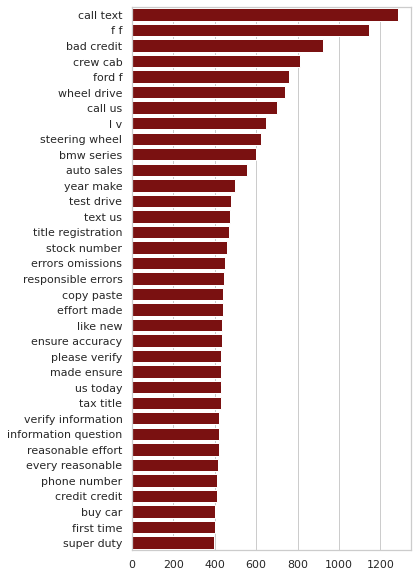

In [403]:
# Graficamos bigramas mas comunes
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(all_words_except_stop_words)))
common_bigrams = {}

for element in freq_dist_bigrams.most_common(35):
    common_bigrams[" ".join(element[0])] = element[1]

series_common_bigrams = pd.Series(common_bigrams)
fig, ax = plt.subplots(figsize = (5,10))
sns.barplot(y = series_common_bigrams.index,
            x = series_common_bigrams,
            color = 'darkred')

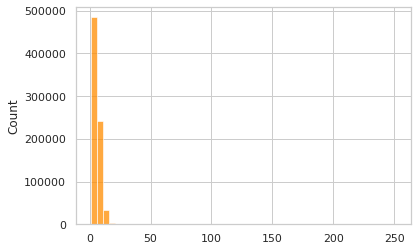

In [404]:
# Histograma de longitud de palabras
word_lengths = pd.Series([len(word) for word in all_words])
sns.histplot(word_lengths, color = 'darkorange', binwidth=5, bins=15)

Hay pocas palabras con una longitud muy grande, lo cual obliga al histograma a expandir las colas

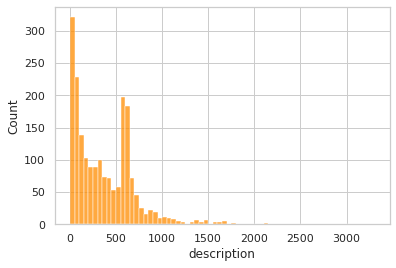

In [405]:
# Histograma de longitud de oraciones
series_length_sentences = tokenized_words.apply(lambda x: len(x))

sns.histplot(series_length_sentences, color = 'darkorange', binwidth = 50)

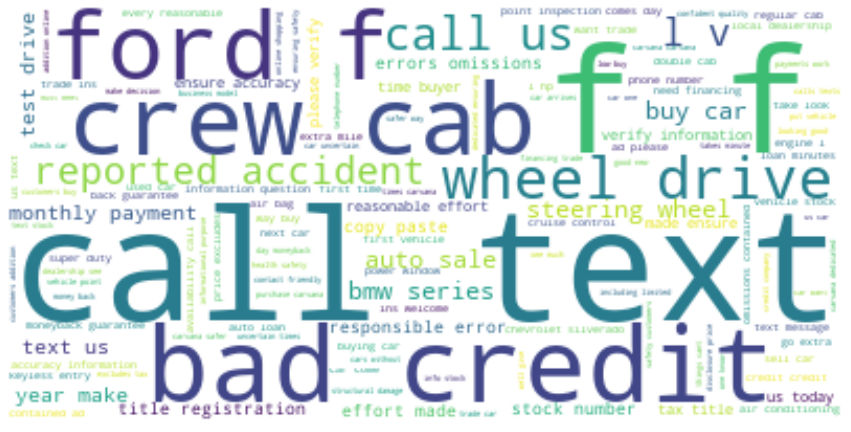

In [406]:
# Nube de palabras
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Podemos ver que las principales palabras tienen que ver con métodos de comunicacion con el vendedor (call, text, call us), referencias al crédito del comprador (bad credit), y el tipo de tracción del vehículo (f wheel drive)

En adición, se propone un modelo NPL para recomendar tres opciones de vehículos a cada cliente dependiendo de su elección. El modelo encuentra el N-top 3 modelos de coches de acuerdo a un conjunto de parámetros específicados en la función de *Gensim Word2Vec*.

In [407]:
df_nlp = df.copy()

df_nlp['makemodel'] = df_nlp['manufacturer']+" "+df_nlp['model']
df_nlp['makemodel'].head()

0                   mazda 3
1                ford e-250
2     honda accord sedan lx
3       toyota rav4 limited
4    ram 1500 tradesman 4x4
Name: makemodel, dtype: object

In [408]:
df1 = df_nlp[['manufacturer','model','condition','fuel','transmission', 'paint_color','makemodel']]
df2 = df1.apply(lambda x: ','.join(x.astype(str)),axis = 1)
df_clean = pd.DataFrame({'clean':df2}) 
df_clean.head()

,clean
0,"mazda,3,good,gas,other,black,mazda 3"
1,"ford,e-250,unknown,gas,automatic,white,ford e-250"
2,"honda,accord sedan lx,good,other,automatic,nan..."
3,"toyota,rav4 limited,excellent,gas,automatic,na..."
4,"ram,1500 tradesman 4x4,excellent,gas,automatic..."


In [409]:
sent = [row.split(',') for row in df_clean['clean']]
sent[:2]

[['mazda', '3', 'good', 'gas', 'other', 'black', 'mazda 3'],
 ['ford', 'e-250', 'unknown', 'gas', 'automatic', 'white', 'ford e-250']]

In [410]:
#NPL Comparativa top 3 vehículos 

from gensim.models import Word2Vec 
model = Word2Vec(sent,min_count =1,size=48, workers = 3,window=3,sg=1,)

print('Top 5 similares al Toyota Camry LE tipo sedan: \n',model.wv.most_similar(positive=["toyota camry le 4dr sedan"], topn = 3))

Top 5 similares al Toyota Camry LE tipo sedan: 
 [('grand marquis ls', 0.9838659167289734), ('mercury mountaineer', 0.983799934387207), ('panamera', 0.9824017882347107)]


<div class="markdown-google-sans">

## <strong>8. Clasificación No Supervisada y Supervisada</strong>
</div>


Una forma de ver las opciones de mercado y su distribución es utilizando los datos como longitud y latitud, sin embargo, al querer realizar una gráfica de dispersión se pueden ver vehículos muy alejados de las principales zonas que provocan una pobre visualización.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



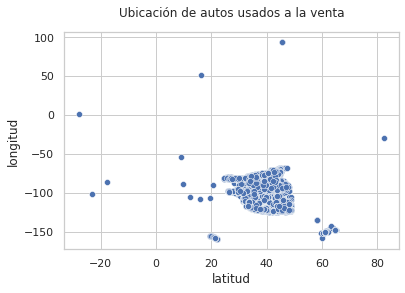

In [411]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicación de autos usados a la venta', pad = 15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(df['lat'], df['long'], ax=ax);

A fin de mejorar la visualización se aplica nuevamente el uso del rango intercuartílico para eliminar valores atípicos.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



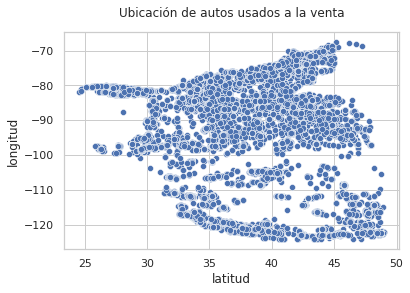

In [412]:
df_copy = filter_by_iqr(df, 'lat')
df_copy = filter_by_iqr(df_copy, 'long')
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicación de autos usados a la venta', pad = 15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(df_copy['lat'], df_copy['long'], ax=ax);

Si fuera de interés establecer agencias de compra-venta de autos seminuevos, teniendo este subset de datos con las ubicaciones se puede aplicar un algoritmo de k-medidas para clasificar en diez grupos y determinar la ubicación de dichas sucursales. Para ello primero se filtra el set de datos por los autos con condición "como nuevo" y "nuevos".

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



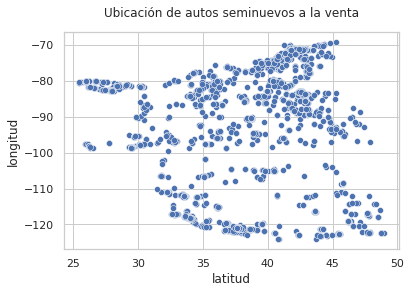

In [413]:
df_kmeans = df_copy.loc[(df_copy['condition'] == 'new') | (df_copy['condition'] == 'like new')]

fig = plt.figure()
ax = fig.add_subplot()
ax.set_title('Ubicación de autos seminuevos a la venta', pad = 15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(df_kmeans['lat'], df_kmeans['long'], ax=ax);

In [414]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=10, max_iter=10000)
k_means.fit(df_kmeans[['lat', 'long']])

KMeans(max_iter=10000, n_clusters=10)

In [415]:
centers = k_means.cluster_centers_
centers

array([[  38.13832358, -121.05786914],
       [  41.45581525,  -74.00828238],
       [  32.6747639 ,  -96.74013   ],
       [  27.92670741,  -81.83053861],
       [  42.26840969,  -90.78458285],
       [  40.93782953,  -83.36831311],
       [  33.90234622, -115.73805441],
       [  45.77845915, -119.32951412],
       [  40.19762858, -107.18322828],
       [  35.36217659,  -82.40284371]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



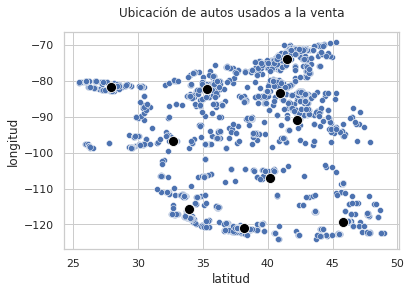

In [416]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicación de autos usados a la venta', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(df_kmeans['lat'], df_kmeans['long'], ax=ax, palette='rainbow');
sns.scatterplot(centers[:,0], centers[:,1], ax=ax, s=100, color='black');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



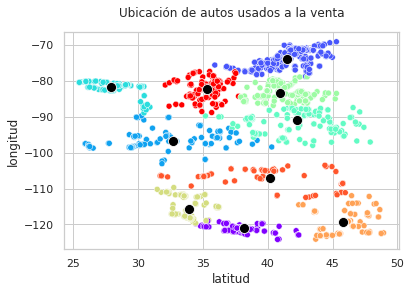

In [417]:
classif = k_means.predict(df_kmeans[['lat', 'long']])
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title('Ubicación de autos usados a la venta', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')
sns.scatterplot(df_kmeans['lat'], df_kmeans['long'], ax=ax, 
                hue = classif, palette='rainbow');
sns.scatterplot(centers[:,0], centers[:,1], ax=ax, s=100, color='black');

ax.get_legend().remove()

Regresión logística

In [418]:
df.groupby('transmission').count()


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,drive,size,type,paint_color,state,lat,long,year_str
transmission,,,,,,,,,,,,,,,,,,,
automatic,34027,34027,34027,34027,34027,34027,34027,20993,33803,34027,33335,24151,11224,25340,23093,34027,34027,34027,34027
manual,2602,2602,2602,2602,2602,2602,2602,1818,2593,2602,2573,1843,933,1829,1805,2602,2602,2602,2602
other,7200,7200,7200,7200,7200,7200,7200,3135,7186,7200,7107,4226,139,7071,5725,7200,7200,7200,7200


In [419]:
df_reglog = df.copy()
df_reglog = df_reglog.dropna()
df.isna().sum()

id                  0
region              0
price               0
year                0
manufacturer        0
model               0
condition           0
cylinders       18020
fuel              256
odometer            0
title_status      820
transmission      154
drive           13688
size            31658
type             9595
paint_color     13256
state               0
lat                 0
long                0
year_str            0
dtype: int64

In [420]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_reglog[["year", "transmission", "cylinders", "fuel", "odometer"]] = df_reglog[["year", "transmission", "cylinders", "fuel", "odometer"]].apply(le.fit_transform)

In [421]:
from sklearn.model_selection import train_test_split



# the attributes "year, transmission, cylinders, fuel and odometer" 
# were found to be highly correlated with condition
# hence are considered for predicting condition
features_p = df_reglog[["year", "transmission", "cylinders", "fuel", "odometer"]]
target_p = df_reglog["condition"]

# splitting our dataset randomly with the test data containing 25% of the data,
x_train, x_test, y_train, y_test = train_test_split(features_p,target_p, 
                                                    test_size=0.25, 
                                                    random_state=1)

In [422]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

classifierLR = LogisticRegression(solver='liblinear')
classifierLR.fit(x_train, y_train)
LR_predicted = classifierLR.predict(x_test)
classifierLR.score(x_test, y_test)

0.46069612827532264